In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
data = train_data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

In [4]:
print(f"Shape of train data: {train_data.shape}")
print(f"Shape of train data: {test_data.shape}")
print(f"Shape of train data: {data.shape}")

Shape of train data: (891, 12)
Shape of train data: (418, 11)
Shape of train data: (891, 12)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


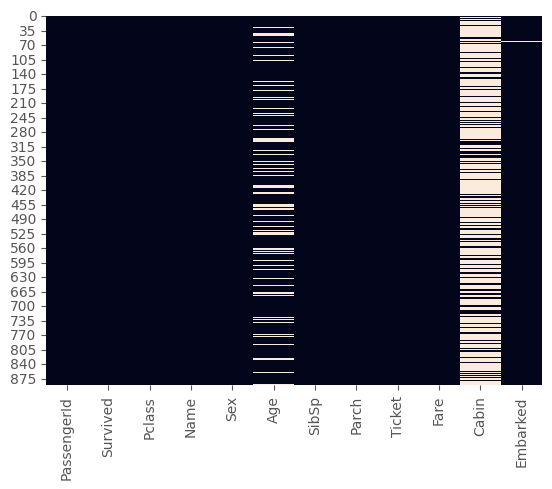

In [7]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),cbar=False)
plt.show()

## Analyising Features

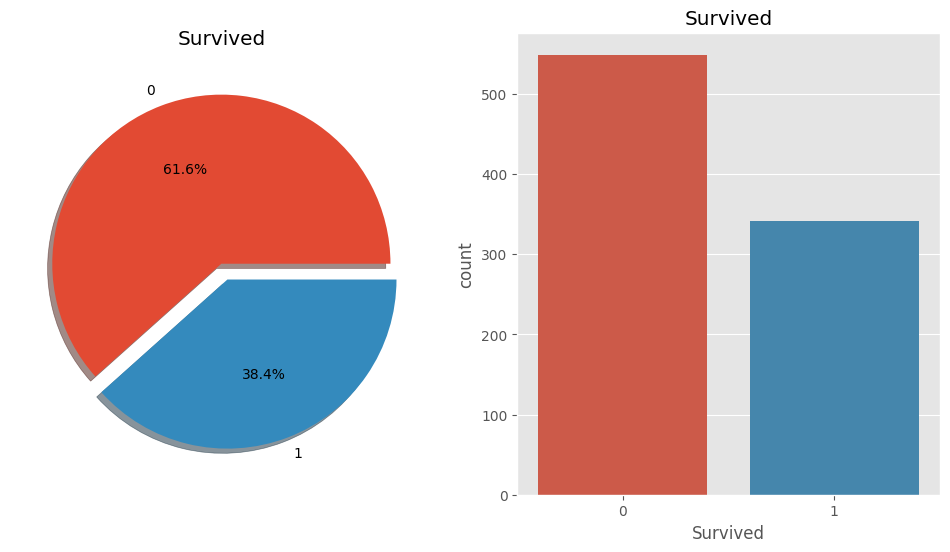

In [8]:
fig, axes=plt.subplots(1,2,figsize=(12,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True)
axes[0].set_title('Survived')
axes[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=axes[1])
axes[1].set_title('Survived')
plt.show()

### Sex

In [9]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

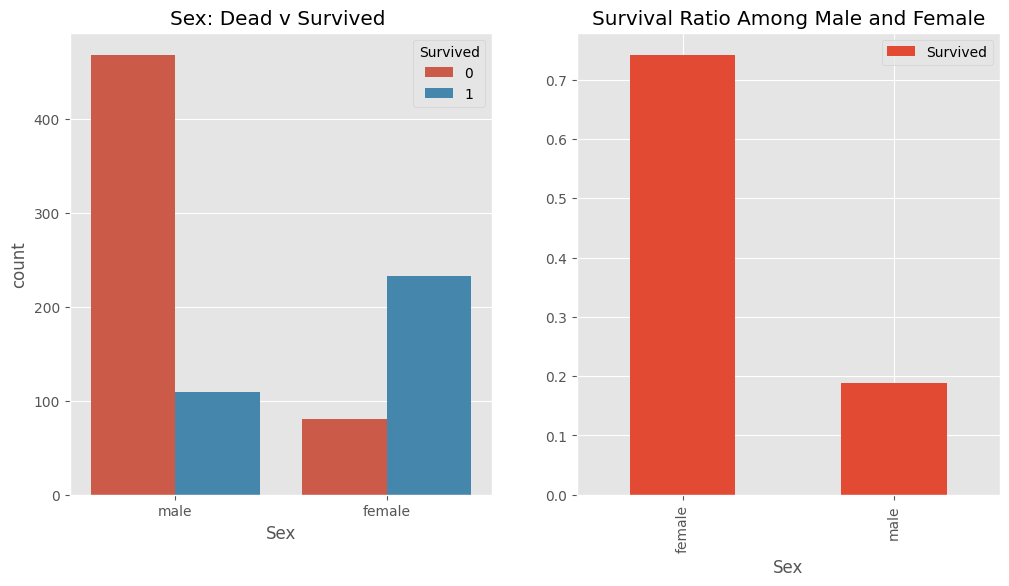

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[0])
axes[0].set_title("Sex: Dead v Survived ")

data[['Sex', 'Survived']].groupby("Sex").mean().plot.bar(ax=axes[1])
axes[1].set_title("Survival Ratio Among Male and Female")

plt.show()


As we can see there was a high percentage of Female Survior 

### Pclass

In [11]:
print(pd.crosstab(data['Pclass'], data['Survived'], margins=True))

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


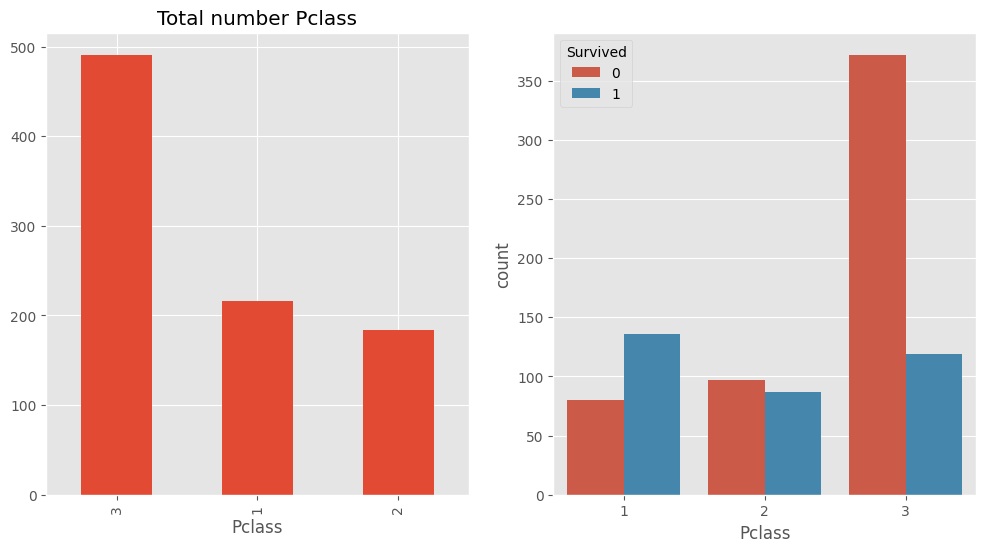

In [12]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

data['Pclass'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('Total number Pclass')

sns.countplot(x='Pclass', hue='Survived', data=data,ax=axes[1])
axes[1].set_title("")

plt.show()

### Age

In [13]:
print(f'The youngest Passenger: {data["Age"].min()}')
print(f'The Oldest Passenger: {data["Age"].max()}')
print(f'The average age Passenger: {round(data["Age"].mean(),2)} ')

The youngest Passenger: 0.42
The Oldest Passenger: 80.0
The average age Passenger: 29.7 


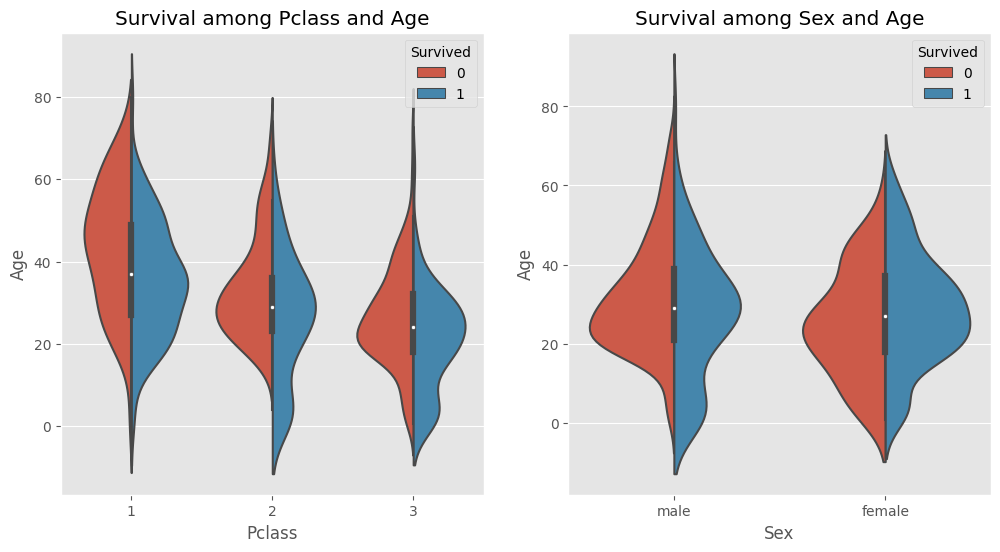

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.violinplot(x='Pclass',y='Age', data=data, hue='Survived', split=True, ax=axes[0])
axes[0].set_title("Survival among Pclass and Age")
sns.violinplot(x='Sex',y='Age', data=data, hue='Survived', split=True, ax=axes[1])
axes[1].set_title("Survival among Sex and Age")
plt.show()

### Observations:
1. The Survial Rate of young increase among the Pclass the survial rate of young looks good,
2. The survial Rate from age 20-40 in Pclass 1 is higher

### Now dealing with null value of Age

we can take the mean of the age and replace it with nan, but there is a problem we cant assign an average of 32.22 to a 5 year old,

however we can see that in the Name columns there are title assigns MR and MSS 
thus we can assign the mean values of Mr and Mrs to the respective groups.

In [15]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data['Name'].str.extract("([A-Za-z]+)\.")

In [16]:
titles = data['Initial'].unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [17]:
pd.crosstab(data['Initial'], data['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
data['Initial'].replace(['Mme', 'Ms','Mlle','Dr','Major','Lady','Countess','Sir','Capt','Col','Jonkheer','Rev', 'Col', 'Don', "Dona"],
                        ['Miss', 'Miss','Miss','Mr','Mr',"Mrs",'Mrs','Mr','Mr', 'Mr','Other','Other','Other','Mr', 'Mrs'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'),"Age"] = 5.48
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'),"Age"] = 21.83
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'),"Age"] = 32.54
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'),"Age"] = 37.04
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'),"Age"] = 44

In [21]:
data['Age'].isnull().any()

False

### Embarked

In [22]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'],data['Survived']], margins=True).T

Embarked          C          Q           S            All
Pclass            1   2   3  1  2   3    1    2    3     
Sex    Survived                                          
female 0          1   0   8  0  0   9    2    6   55   81
       1         42   7  15  1  2  24   46   61   33  231
male   0         25   8  33  1  1  36   51   82  231  468
       1         17   2  10  0  0   3   28   15   34  109
All              85  17  66  2  3  72  127  164  353  889

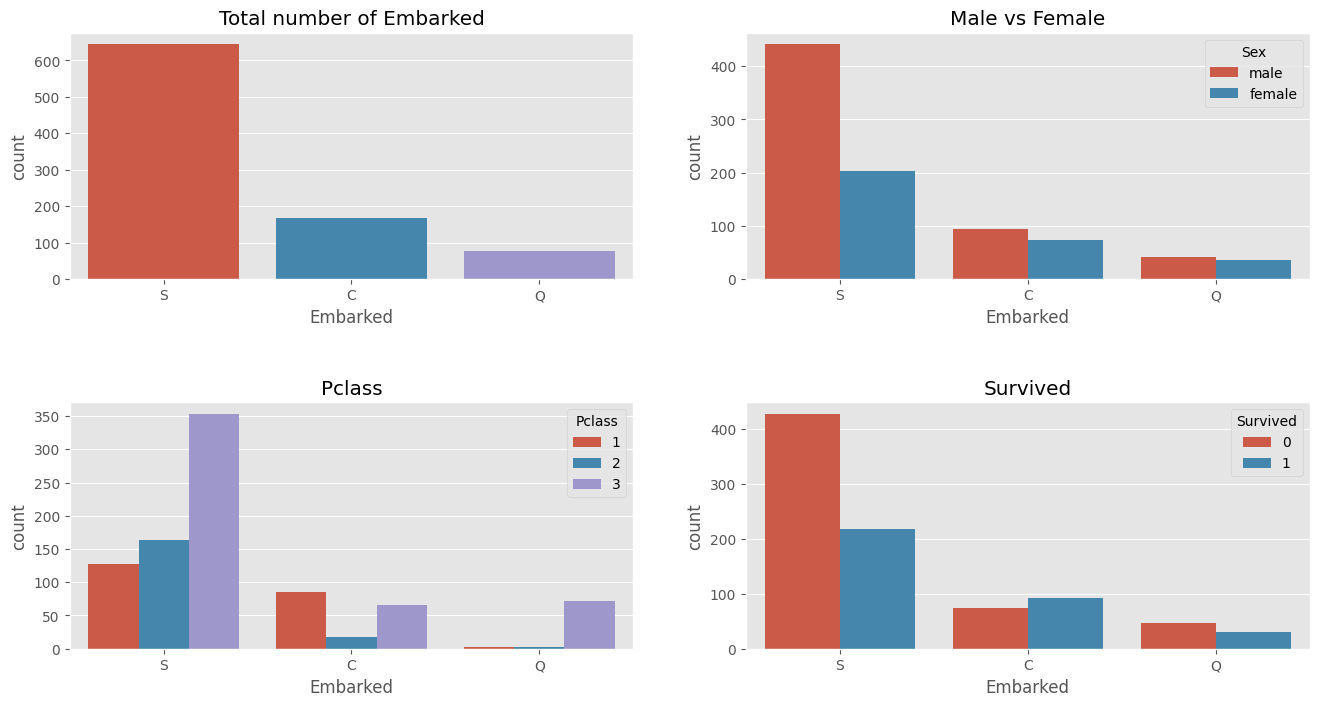

In [23]:
fig, axes = plt.subplots(2,2,figsize=(16,8))

sns.countplot(x='Embarked', data=data, ax=axes[0,0])
axes[0,0].set_title("Total number of Embarked")
sns.countplot(x='Embarked', hue='Sex', data=data, ax=axes[0,1])
axes[0,1].set_title('Male vs Female')
sns.countplot(x='Embarked',hue='Pclass', data=data, ax=axes[1,0])
axes[1,0].set_title('Pclass')
sns.countplot(x='Embarked',hue='Survived', data=data, ax=axes[1,1])
axes[1,1].set_title('Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

majority of the passenger from either class embarked from S

In [24]:
data['Embarked'].fillna("S", inplace=True)
data["Embarked"].isnull().any()

False

In [25]:
pd.crosstab(data['SibSp'],data['Survived'],margins=True).T

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


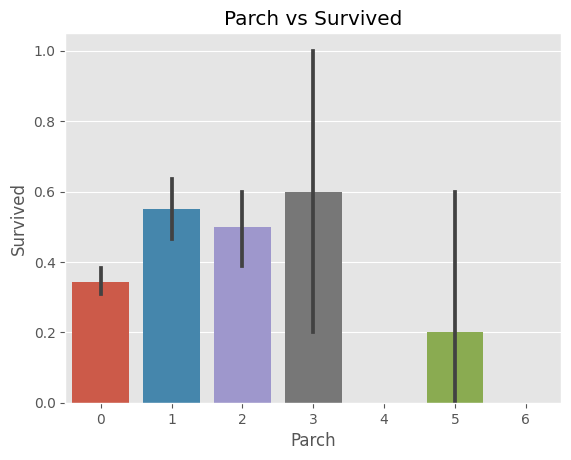

In [26]:
sns.barplot(x='Parch',y='Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

# Feature Engineering 

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
data['Family_size'] = 0
data['Family_size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_size']==0, 'Alone'] = 1

In [29]:
pd.crosstab(data['Family_size'],data['Survived'], margins=True).T

Family_size,0,1,2,3,4,5,6,7,10,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


### converting continous to categroical 

Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value

In [30]:
bands = max(data['Age'])/5
print(bands)

16.0


In [31]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_size,Alone,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1


### Converting String into numeric

In [32]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_size,Alone,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,0,1,1


In [33]:
feature = ['PassengerId','Survived','Name', 'Age','Ticket','Fare', 'Cabin']
X = data.drop(feature, axis=1)
y = data['Survived']
y.dropna()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Predictive Modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47) # For feature data

## Logistic Regression

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)



print(f'The Accuracy of the Logistic Regression is : {round(lr_accuracy,2)}')


The Accuracy of the Logistic Regression is : 0.79


## Decision Tree

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)


print(f'The Accuracy of the Decision Tree is : {round(dt_accuracy,2)}')

The Accuracy of the Decision Tree is : 0.77


## KNN

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)


print(f'The Accuracy of the KNN is : {round(knn_accuracy,2)}')


The Accuracy of the KNN is : 0.79


## Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"The Accuracy of Random Forest: {round(rf_accuracy,2)}")

The Accuracy of Random Forest: 0.77


# Cross Validation 

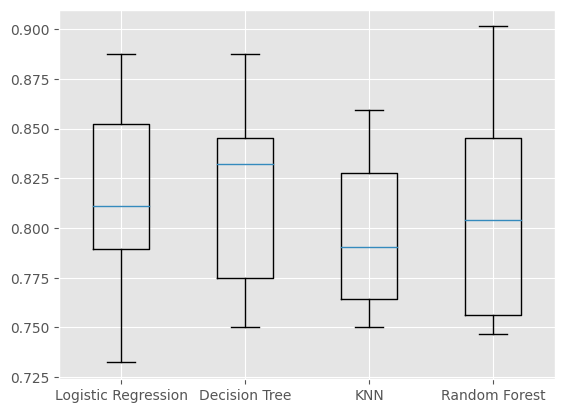

In [40]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

models = {"Logistic Regression":LogisticRegression(),
          "Decision Tree":DecisionTreeClassifier(),
          "KNN":KNeighborsClassifier(), 
          "Random Forest":RandomForestClassifier()}

results = []


for model in models.values():
    kf = KFold(n_splits=10, random_state=47, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

plt.boxplot(results, labels=models.keys())
plt.show()

## Confusion Matrix 
Confusion Matrix gives the number of correct and incorrect classifications made by the classifier.

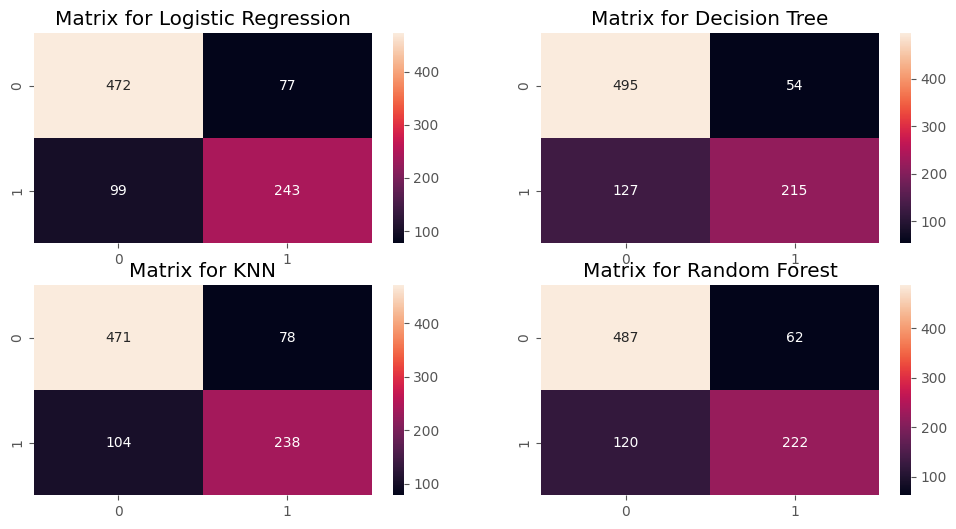

In [41]:
fig, axes = plt.subplots(2,2,figsize=(12,6))
log_pred = cross_val_predict(LogisticRegression(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, log_pred), annot=True, ax=axes[0,0],fmt='2.0f')
axes[0,0].set_title("Matrix for Logistic Regression")

dt_pred = cross_val_predict(DecisionTreeClassifier(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, dt_pred), annot=True, ax=axes[0,1],fmt='2.0f')
axes[0,1].set_title("Matrix for Decision Tree")

knn_pred = cross_val_predict(KNeighborsClassifier(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, knn_pred), annot=True, ax=axes[1,0],fmt='2.0f')
axes[1,0].set_title("Matrix for KNN")

rf_pred = cross_val_predict(RandomForestClassifier(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, rf_pred), annot=True, ax=axes[1,1],fmt='2.0f')
axes[1,1].set_title("Matrix for Random Forest")

plt.subplots_adjust(hspace=.2,wspace=.2)
plt.show()

# Hyper Tunning Parameters

In [42]:
from sklearn.model_selection import GridSearchCV

n_estimators = range(100,1000,100)

params = {'n_estimators':n_estimators,
          'max_depth': [None, 5, 10],}

gd_rf = GridSearchCV(rf, params, verbose=True)
gd_rf.fit(X_train, y_train)

print("Tuned Random Forest Parameters: {}".format(gd_rf.best_params_))
print("Tuned Random Forest Best Accuracy Score: {}".format(gd_rf.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuned Random Forest Parameters: {'max_depth': 5, 'n_estimators': 200}
Tuned Random Forest Best Accuracy Score: 0.8356347877474637


# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent type

In [43]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression',log_reg),('KNN',knn),('Decision Tree',dt),('Random Forest', rf)]


for name, model in  classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, y_pred)*100}")

print("="*100)

vc = VotingClassifier(classifiers, voting='soft')

vc.fit(X_train, y_train)

print('The accuracy for ensembled model is:',vc.score(X_test,y_test))
cross=cross_val_score(vc ,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

Logistic Regression: 78.77094972067039
KNN: 78.77094972067039
Decision Tree: 77.09497206703911
Random Forest: 77.6536312849162
The accuracy for ensembled model is: 0.770949720670391
The cross validated score is 0.8092759051186018


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

In [44]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(dt, random_state=47, n_estimators=100)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print('The accuracy for bagged Decision Tree is:',accuracy_score(y_pred, y_test))
result=cross_val_score(bag,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7821229050279329
The cross validated score for bagged Decision Tree is: 0.8058926342072409


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)

result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')

print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8260424469413234


In [46]:
n_estimators=list(range(100,1100,100))

learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)

gd.fit(X,y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.830500282468144
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


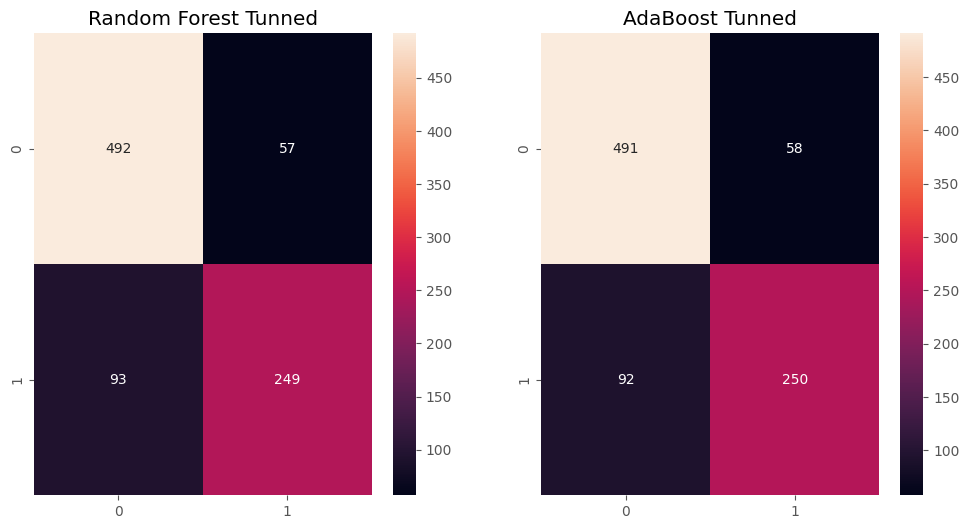

In [47]:
# tunned Ada boost classifier 
ada_tuned = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=47)
ada_result = cross_val_predict(ada_tuned, X,y, cv=10)
# tunned Random Forest 
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_result = cross_val_predict(rf_tuned, X,y, cv=10)

fig , axes = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(confusion_matrix(y, rf_result), annot=True, fmt='2.0f', ax=axes[0])
axes[0].set_title("Random Forest Tunned")
sns.heatmap(confusion_matrix(y, ada_result), annot=True, fmt='2.0f', ax=axes[1])
axes[1].set_title("AdaBoost Tunned")

plt.show()

### Important Features

In [48]:
rf_tuned.fit(X_train, y_train)
rf_importances = pd.Series(rf_tuned.feature_importances_, X_train.columns).sort_values(ascending=True)

ada_tuned.fit(X_train, y_train)
ada_importances = pd.Series(ada_tuned.feature_importances_, X_train.columns).sort_values(ascending=True)


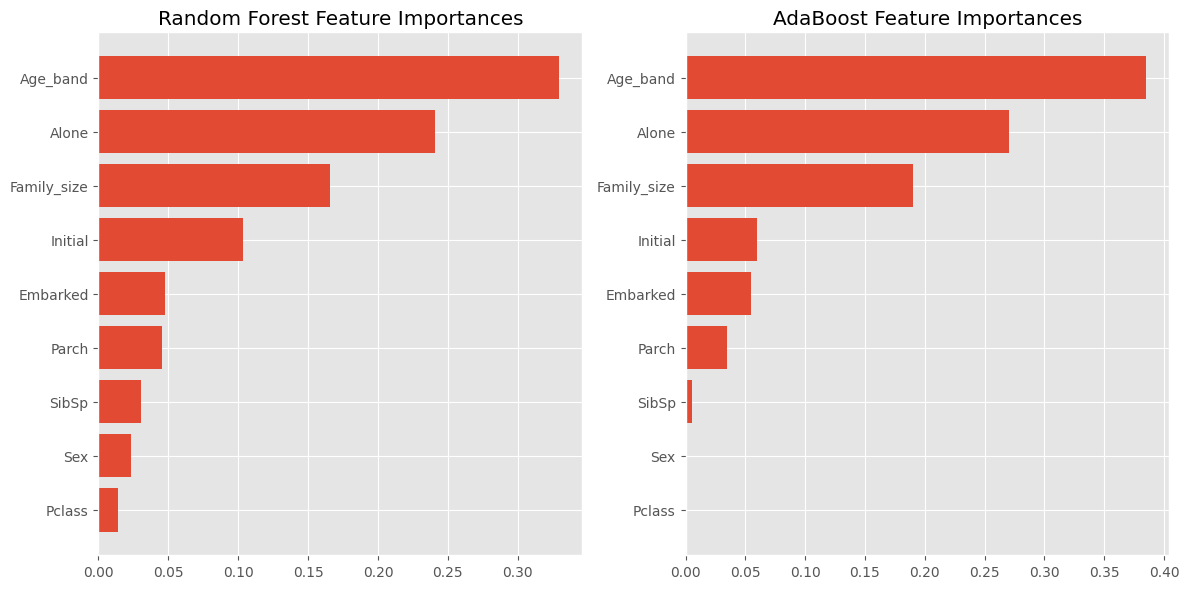

In [49]:
fig, axes= plt.subplots(1,2, figsize=(12,6))
# Plot Random Forest feature importances
axes[0].barh(range(len(rf_importances)), rf_importances, align='center')
axes[0].set_yticks(range(len(rf_importances)))
axes[0].set_yticklabels(X.columns)  # Assuming X is a DataFrame
axes[0].set_title("Random Forest Feature Importances")

# Plot AdaBoost feature importances
axes[1].barh(range(len(ada_importances)), ada_importances, align='center')
axes[1].set_yticks(range(len(ada_importances)))
axes[1].set_yticklabels(X.columns)  # Assuming X is a DataFrame
axes[1].set_title("AdaBoost Feature Importances")

plt.tight_layout()
plt.show()

In [50]:
predictions = ada_tuned.predict(X_test)


aligned_test_data = test_data.iloc[:len(predictions)]
output = pd.DataFrame({'PassengerId':  aligned_test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


In [51]:
output.value_counts('Survived')

Survived
0    118
1     61
Name: count, dtype: int64